In [28]:
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#import tensorflow
import soundfile as sf
import matplotlib.pyplot as plt
import json
from scipy.fftpack import fft, fftfreq
import sklearn.metrics
import librosa
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import os
import pandas as pd

## Daten einlesen
siehe librosa_files

In [2]:
# adjust as necessary
max_file_count = 50
none_replacement = 'all'

In [3]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import os

In [4]:
cut_dir = os.path.join(os.pardir, 'fft')
fft_file = os.path.join(cut_dir, f'fft_feature_cut_{max_file_count or none_replacement}.npy')
label_file = os.path.join(cut_dir, f'labels_cut_{max_file_count or none_replacement}.npy')
freq_file = os.path.join(cut_dir, f'fft_freq_{max_file_count or none_replacement}.npy')

feature_matrix = np.load(fft_file)
labels = np.load(label_file)
fft_freq = np.load(freq_file)

## 2D Plot

Die Daten werden durch zwei Bandfilter gefiltert. 2,5 - 3 Mhz wird auf die X-Achse und 2,5 - 3 Mhz auf die Y-Achse abgebildet

[ 0.  1.  2. ... -3. -2. -1.]


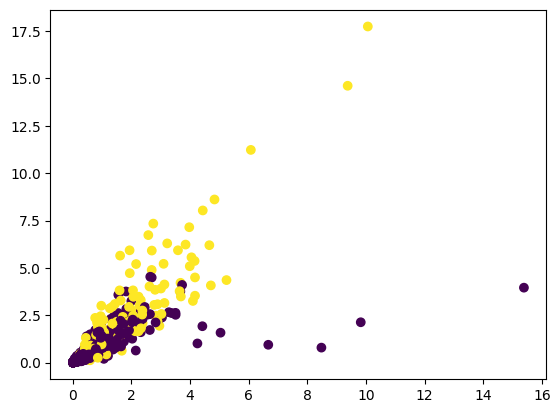

In [5]:
xs = []
ys = []
l = []

print(fft_freq)
for feature, label in zip(feature_matrix, labels):
    filter_1 = np.average([np.abs(feature[x]) for x in np.where((fft_freq >= 3000) & (fft_freq <= 3250))])
    filter_2 = np.average([np.abs(feature[x]) for x in np.where((fft_freq >= 3250) & (fft_freq <= 3500))])
    
    if ~np.isnan(filter_1) and ~np.isnan(filter_2):
        xs.append(filter_1)
        ys.append(filter_2)
        l.append(label)

plt.scatter(xs,ys,c=l)
plt.show()

## 2D Perceptron

In [6]:
def learn(X, w, y, r) :
    predict = np.ravel(np.sign(X.dot(w.transpose())))
    errors = np.abs(1/2*(predict - y.transpose()))
    corection = X.T.dot(errors * -y)
    w = w - r * corection
    return w


def error(X, w, y) :
    predict = np.ravel(np.sign(X.dot(w.transpose())))
    errors = np.abs(1/2*(predict - y.transpose()))
    return 1 - np.sum(errors) / errors.shape

In [7]:
def fun(x, w):
    return w[0]/-w[2] + w[1]/-w[2] * x

In [8]:
xs = []
ys = []
l = []

print(fft_freq)
for feature, label in zip(feature_matrix, labels):
    filter_1 = np.average(np.abs(feature[((fft_freq >= 3000) & (fft_freq <= 3250))]))
    filter_2 = np.average(np.abs(feature[((fft_freq >= 3250) & (fft_freq <= 3500))]))
    
    if ~np.isnan(filter_1) and ~np.isnan(filter_2):
        xs.append(filter_1)
        ys.append(filter_2)
        l.append(label)

p = np.vstack((np.ones(len(xs)), xs, ys)).T


[ 0.  1.  2. ... -3. -2. -1.]


In [9]:
w= np.array([1, 1, 1])

Accuracy: 0.9915775236690029


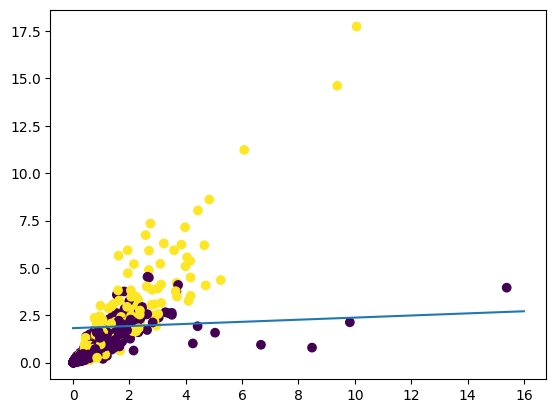

In [10]:
for i in range(100):
    w = learn(p, w, np.array(l).T, 0.025)
print(f"Accuracy: {error(p, w, np.array(l).T)[0]}")
plt.plot([0, 16],[fun(0, w), fun(7, w)])
plt.scatter(xs, ys, c=l)
plt.show()

## Mehrdimensionaler Gradientenabstieg


In [52]:

def learn(X, w, y, r) :
    predict = np.ravel(np.sign(X.dot(w.transpose())))
    errors = np.abs(1/2*(predict - y.transpose()))
    corection = X.T.dot(errors * -y)
    w = w - r * corection
    return w


def error(X, w, y) :
    predict = np.ravel(np.sign(X.dot(w.transpose())))
    errors = np.abs(1/2*(predict - y.transpose()))
    print(errors)
    return 1 - np.sum(errors) / errors.shape

def fone(X, w, y) :
    predict = np.ravel(np.sign(X.dot(w.transpose())))
    _ = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y, predict)
    return sklearn.metrics.f1_score(y, predict)¶

In [53]:
botfreq = 2000
topfreq = 4000
print(abs(feature[((fft_freq > botfreq) & (fft_freq < topfreq))]))

[0.577  0.1284 0.6729 ... 0.1338 0.6052 0.3728]


In [54]:
botfreq = 2500
topfreq = 3500

s = []
l = []
for feature, label in zip(feature_matrix, labels):
    band = np.abs(feature[((fft_freq > botfreq) & (fft_freq < topfreq) & (fft_freq % 100 == 0))])
    s.append(band)
    l.append(label)

s = np.array(s)
print(s.shape)
p = np.vstack(([1] * s.shape[0], s.T)).T


(16266, 9)


In [55]:
w = np.ones(p.shape[1])

[0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.9925611705397762


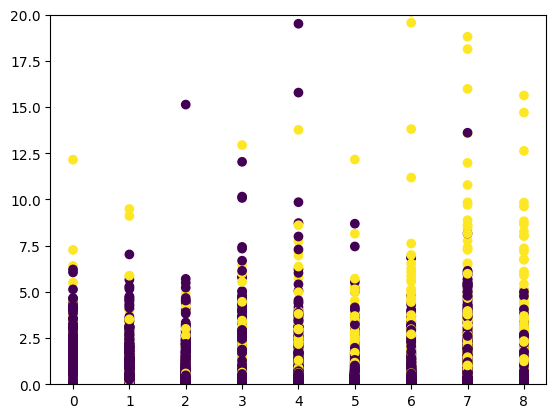

In [66]:
for i in range(100):
    w = learn(p, w, np.array(l).T, 0.00025)
print(f"Accuracy: {error(p, w, np.array(l).T)[0]}")
for i in range(0, s.shape[1]):
    plt.scatter(np.ones(s.T[i].shape) * i, s.T[i] , c=l)
plt.ylim(0,20)
plt.show()

F1:0.5870307167235495


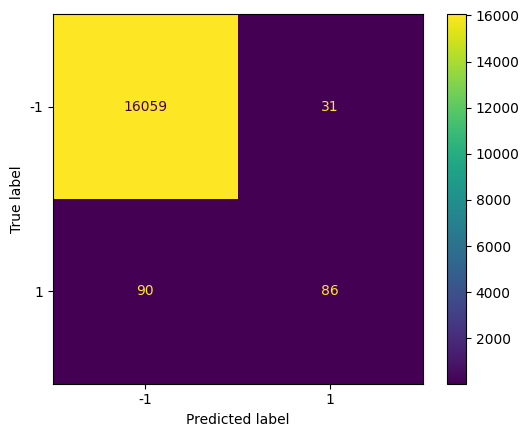

In [67]:
print(f"F1:{fone(p, w, np.array(l))}")